
# Natural Language Processing
## Decoding the representation of natural language from fMRI 

Decoding the natural language that represents semantic/narrative content from the neural activation patterns is a topic of interest in the field of cognitive neuroscience. By analyzing the linear relationship between functional MRI (fMRI) of multiple subjects and the corresponding movie annotations ([Vodrahali et al., 2018](https://doi.org/10.1016/j.neuroimage.2017.06.042)) or speech ([Huth et al., 2016](https://doi.org/10.1038/nature17637)), recent studies have shown that semantic or narrative content can be decoded from neural response patterns.  


**Goal**
Decode natural language informaiton from fMRI data using a cross-validated, predictive model

## Getting Started
Make sure you have the necessary software installed and data downloaded.

### Software
This tutorial requires the following Python packages to be installed. 

- matplotlib
- numpy
- scipy
- pandas
- sklearn
- nltk
- nibabel
- nilearn
- nltools
- requests
- datalad

In [1]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 77.2 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


In [2]:
!pip install nltools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 14.2 MB/s eta 0:00:00


In [3]:
!pip install datalad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00


In [4]:
!pip install datalad-installer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!sudo apt-get install netbase

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  netbase
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 13.1 kB of archives.
After this operation, 44.0 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 netbase all 6.1 [13.1 kB]
Fetched 13.1 kB in 1s (19.1 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package netbase.
(Reading database ... 122518 files and directories currently install

In [6]:
!datalad-installer git-annex -m datalad/packages

2023-05-02T19:02:29+0000 [INFO    ] datalad_installer Writing environment modifications to /tmp/dl-env-6z2bstee.sh
2023-05-02T19:02:29+0000 [INFO    ] datalad_installer Installing git-annex via datalad/packages
2023-05-02T19:02:29+0000 [INFO    ] datalad_installer Version: None
2023-05-02T19:02:29+0000 [INFO    ] datalad_installer Fetching latest version ...
2023-05-02T19:02:29+0000 [INFO    ] datalad_installer Downloading http://datasets.datalad.org/datalad/packages/latest-version
2023-05-02T19:02:29+0000 [INFO    ] datalad_installer Found latest version: 10.20230407
2023-05-02T19:02:29+0000 [INFO    ] datalad_installer Downloading https://datasets.datalad.org/datalad/packages/neurodebian/git-annex-standalone_10.20230407-1~ndall+1_amd64.deb
About to run the following command as an administrator:
    dpkg -i '/tmp/tmpkib64dbl/git-annex-standalone_10.20230407-1~ndall+1_amd64.deb'
Proceed? [y/a/n] y
2023-05-02T19:03:14+0000 [INFO    ] datalad_installer Running: sudo dpkg -i '/tmp/tmpkib6

In [7]:
# Import libraries and configurations.
import re
import csv
import os
import pickle
import glob

# for scientific computing and data visualization 
import numpy as np
import pandas as pd
from scipy import signal
from scipy.stats import zscore
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# for natural language processing
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt') # Download package punkt if you don't have

# for machine learning
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics.pairwise import cosine_similarity

# for handling neuroimaging data
import nibabel as nib
from nilearn.plotting import view_img, view_img_on_surf
from nltools.data import Brain_Data
from nltools.external import glover_hrf
from nltools.mask import expand_mask, roi_to_brain

# for downloading data
import requests
import datalad.api as dl

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Data
We will use the **Paranoia** dataset of [Finn et al. (2018)](https://www.nature.com/articles/s41467-018-04387-2). This dataset consists of 22 participants' fMRI data, as they listened to a 22-minute audio-narrated story. Each participant's fMRI data contains three runs. The goal is moment-to-moment decoding of the natural language information from the corresponding fMRI responses.

Change `data_dir` to wherever you have installed the Paranoia datalad repository (e.g. `~/data`). We will initialize a datalad dataset instance and get the files we need.

In [8]:
!git config --global user.email "sashank.ssridhar@gmail.com"
!git config --global user.name "sashanksridhar"

In [9]:
!datalad install https://gin.g-node.org/ljchang/Paranoia

Cloning:   0% 0.00/2.00 [00:00<?, ? candidates/s]
Enumerating: 0.00 Objects [00:00, ? Objects/s]
                                              
Counting:   0% 0.00/23.9k [00:00<?, ? Objects/s]
Counting:  60% 14.4k/23.9k [00:00<00:00, 53.0k Objects/s]
                                                         
Compressing:   0% 0.00/13.1k [00:00<?, ? Objects/s]
                                                   
Receiving:   0% 0.00/23.9k [00:00<?, ? Objects/s]
Receiving:   1% 240/23.9k [00:00<00:26, 888 Objects/s]
Receiving:   2% 479/23.9k [00:00<00:23, 984 Objects/s]
Receiving:   8% 1.92k/23.9k [00:00<00:07, 3.07k Objects/s]
Receiving:  10% 2.39k/23.9k [00:01<00:09, 2.22k Objects/s]
Receiving:  15% 3.59k/23.9k [00:01<00:08, 2.40k Objects/s]
Receiving:  21% 5.03k/23.9k [00:01<00:05, 3.62k Objects/s]
Receiving:  27% 6.46k/23.9k [00:01<00:03, 5.09k Objects/s]
Receiving:  34% 8.22k/23.9k [00:02<00:02, 5.58k Objects/s]
Receiving:  39% 9.34k/23.9k [00:02<00:03, 4.23k Objects/s]
Receiving:  55

In [10]:
data_dir = '/content/Paranoia' # Change this for your computer

# If dataset hasn't been installed, clone from GIN repository
dl.clone(source='https://gin.g-node.org/ljchang/Paranoia', path=data_dir)

# # Initialize dataset
ds = dl.Dataset(data_dir)

result = ds.get(glob.glob(os.path.join(data_dir, 'participants.tsv')))

# # Get Cropped & Denoised Nifti Files
# result = ds.get(glob.glob(os.path.join(data_dir, 'fmriprep', '*', 'func', '*denoise_smooth6mm_task-story*nii.gz')))

#Get Average Time Series within Parcellation
result = ds.get(glob.glob(os.path.join(data_dir, 'fmriprep', '*', 'func', '*_nodeTimeSeries.csv')))

# Get Forced Aligned transcripts
result = ds.get(glob.glob(os.path.join(data_dir, 'stimuli', 'paranoia_story*_transcript.txt')))

INFO:datalad.annex:Start annex operation
INFO:datalad.annex:Finished annex get
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad.annex:Start annex operation


get(ok): participants.tsv (file) [from origin...]


INFO:datalad.annex:Start annex action: {'command': 'get', 'note': 'from origin...', 'input': ['fmriprep/sub-tb3757/func/sub-tb3757_run-2_nodeTimeSeries.csv'], 'key': 'MD5E-s1333082--d2097f3f81d0dd2f70d631bd06fd7380.csv', 'file': 'fmriprep/sub-tb3757/func/sub-tb3757_run-2_nodeTimeSeries.csv'}
INFO:datalad.annex:0.59%
INFO:datalad.annex:6.41%
INFO:datalad.annex:11.96%
INFO:datalad.annex:21.79%
INFO:datalad.annex:50.67%
INFO:datalad.annex:62.35%
INFO:datalad.annex:76.48%
INFO:datalad.annex:91.84%
INFO:datalad.annex:99.83%
INFO:datalad.annex:Finished annex action: None
INFO:datalad.annex:fmriprep/sub-tb3757/func/sub-tb3757_run-2_nodeTimeSeries.csv
INFO:datalad.annex:Start annex action: {'command': 'get', 'note': 'from origin...', 'input': ['fmriprep/sub-tb3240/func/sub-tb3240_run-2_nodeTimeSeries.csv'], 'key': 'MD5E-s1329429--0c2103cab7210eacefb55679407fba97.csv', 'file': 'fmriprep/sub-tb3240/func/sub-tb3240_run-2_nodeTimeSeries.csv'}
INFO:datalad.annex:7.39%
INFO:datalad.annex:17.25%
INFO

get(ok): fmriprep/sub-tb3757/func/sub-tb3757_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3240/func/sub-tb3240_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3602/func/sub-tb3602_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3512/func/sub-tb3512_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3592/func/sub-tb3592_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3757/func/sub-tb3757_run-3_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb4547/func/sub-tb4547_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3929/func/sub-tb3929_run-3_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3858/func/sub-tb3858_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3977/func/sub-tb3977_run-3_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3626/func/sub-tb3626_run-1_nodeTimeS

INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:

get(ok): fmriprep/sub-tb3757/func/sub-tb3757_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3744/func/sub-tb3744_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3592/func/sub-tb3592_run-3_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3846/func/sub-tb3846_run-3_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3858/func/sub-tb3858_run-3_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb4450/func/sub-tb4450_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3279/func/sub-tb3279_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3240/func/sub-tb3240_run-3_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3810/func/sub-tb3810_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3512/func/sub-tb3512_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3920/func/sub-tb3920_run-2_nodeTimeS

INFO:datalad.annex:Start annex action: {'command': 'get', 'note': 'from origin...', 'input': ['stimuli/paranoia_story1_transcript.txt'], 'key': 'MD5E-s43376--288a5f1f8adb5aaf78546bf897f22e59.txt', 'file': 'stimuli/paranoia_story1_transcript.txt'}
INFO:datalad.annex:18.89%
INFO:datalad.annex:Finished annex action: None
INFO:datalad.annex:stimuli/paranoia_story1_transcript.txt
INFO:datalad.annex:Start annex action: {'command': 'get', 'note': 'from origin...', 'input': ['stimuli/paranoia_story2_transcript.txt'], 'key': 'MD5E-s38537--6e3d1b7acd73c65cfb5cf0552b4bbaa8.txt', 'file': 'stimuli/paranoia_story2_transcript.txt'}
INFO:datalad.annex:85.03%
INFO:datalad.annex:Finished annex action: None
INFO:datalad.annex:stimuli/paranoia_story2_transcript.txt
INFO:datalad.annex:Finished annex get
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
IN

get(ok): stimuli/paranoia_story1_transcript.txt (file) [from origin...]
get(ok): stimuli/paranoia_story2_transcript.txt (file) [from origin...]
get(ok): stimuli/paranoia_story3_transcript.txt (file) [from origin...]
action summary:
  get (ok: 3)


## Functional MRI data
To reduce the fMRI data's dimensionality, we extract the mean time course of the regions of interest (ROIs), which is defined using the whole-brain functional parcellation called the Shen atlas ([Shen et al., 2013](https://www.sciencedirect.com/science/article/abs/pii/S1053811913005818)), which has 268 parcels. Other dimensionality reduction methods (e.g., PCA, ICA, SRM, etc.) can be chosen.

### Parcellation Atlas
Let's visualize the Shen et al., 2013 Parcellation scheme. Here, we download the mask directly from [neurovault](https://neurovault.org/images/395091/) using `nltools` and then plot with `nilearn`.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



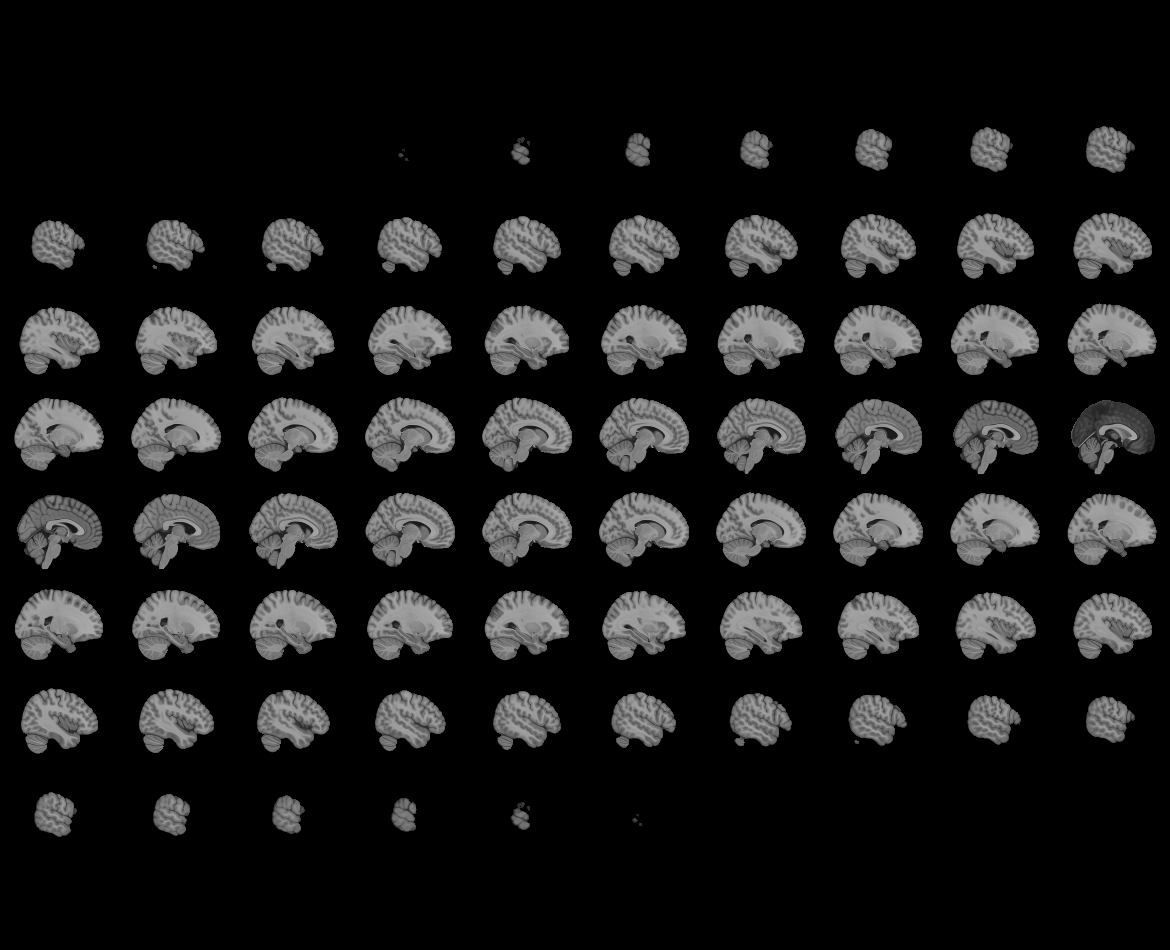
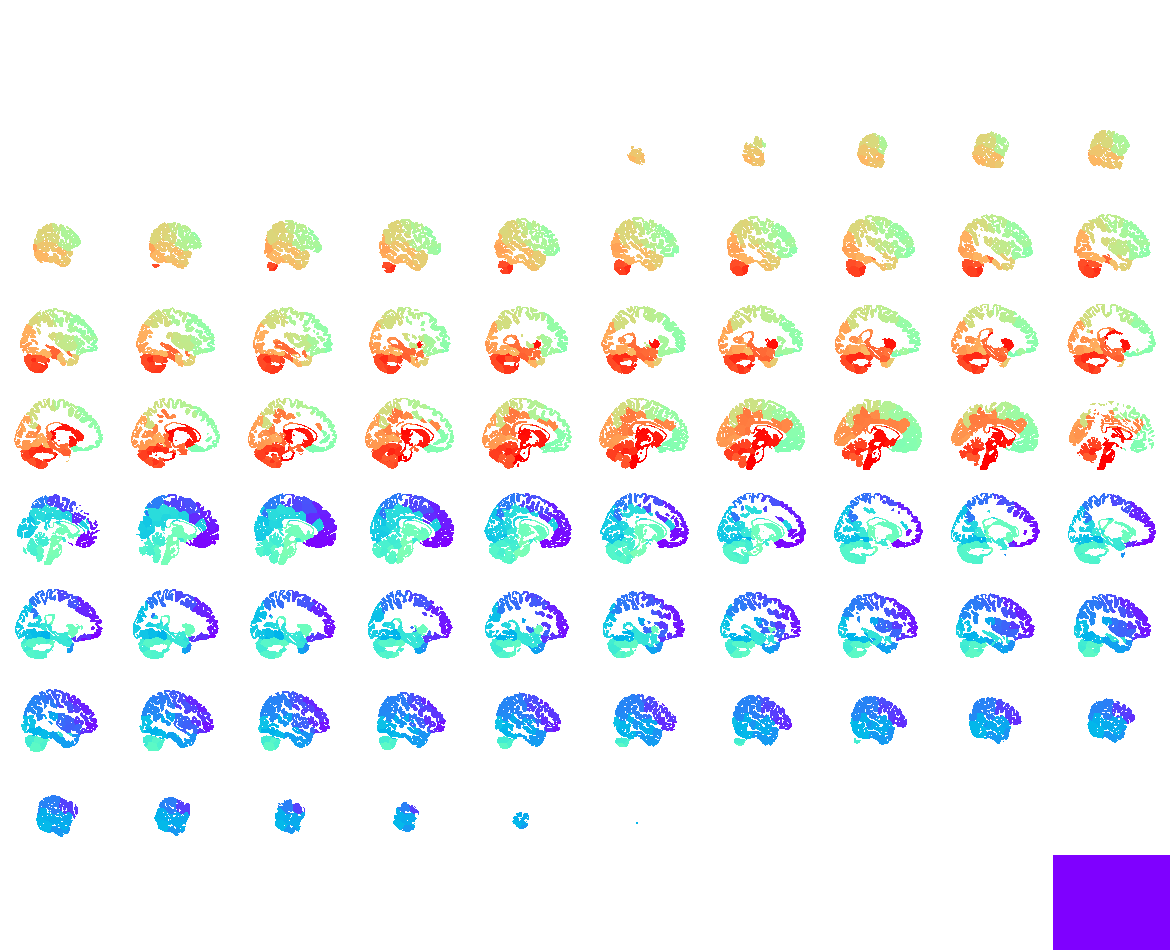

In [11]:
mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')

view_img(mask.to_nifti(), symmetric_cmap=False, cmap='rainbow')

### Mean time course of ROIs
Next, we will extract the mean time course from all voxels in each ROI.

The original fMRI data is 4D `(91, 109, 91, 1310)`, which corresponds to `(x, y, z, time)`. The Shen Atlas has 268 ROIs, so the dimensions of the reduced data should be `(1310, 268)`. 

Next, we'll create node time series for all subjects for all runs. There are 22 subjects, each with 3 runs, so this will take a little while (~45 min). To speed this up, we have already run the code and shared the extracted csv files in the datalad repository. If you would like to run this yourself, make sure you have the correct data downloaded and paste this code into a new cell and run it. 


In [12]:
data_dir = '/content/Paranoia' # Change this for your computer

behav_data = pd.read_csv('Paranoia/participants.tsv', sep='\t')

subj_list = behav_data["participant_id"]

fmri_data = []
for subj in subj_list:
    sub_data = []
    for run in range(1,4):
        sub_data.append(pd.read_csv(os.path.join(data_dir, 'fmriprep', subj, 'func', f'{subj}_run-{run}_nodeTimeSeries.csv')))
    sub_data = pd.concat(sub_data)
    fmri_data.append(sub_data.values)
fmri_data = np.array(fmri_data)

print(fmri_data.shape)

(22, 1310, 268)


We have 22 subjects x 1310 TRs (which is the number of timepoints in across all runs) x 268 parcels.

## Word embedding

Next, we transform natural language information from the Paranoia transcript into vector representations using natural language processing (NLP) to represent the semantic meanings of the story quantitatively. We have performed forced alignment to get the onset of each word using the [Pliers](https://github.com/tyarkoni/pliers) toolbox in the [Automated Annotation](http://naturalistic-data.org/features/notebooks/Pliers_Tutorial.html) tutorial. To represent each word in the Paranoia stimuli, we use a pretrained word embedding model. The purpose is to project each word into a point in a multi-dimensional embedding space, so that it retains its semantic relationship with all other words. 

### GloVe: Pretrained word embedding
The `GloVe: Global Vectors for Word Representation` is a widely used word embedding algorithm ([Pennington, Socher & Manning, 2014](https://nlp.stanford.edu/pubs/glove.pdf)). GloVe provides pretrained word vectors made from a variety of large corpus. You can check more information and download pretrained models [here](https://nlp.stanford.edu/projects/glove/). 

We will use the `glove.6B.100d.txt` model, which contains a feature dimensionality of 100. This file is 862mb to [download](https://nlp.stanford.edu/pubs/glove.pdf). You can download the file, unzip, and then load using the `get_glove_model` function. 

In [13]:
def get_glove_model(url):
    '''Load glove.6B.100d model from URL or File
    
    Args:
        url: (str) either a url to text file, or a path to a local file
        
    Return:
        glove embeddings: (dict) glove embeddings
    '''

    pre_glove_100 = {}
    if 'http:' in url or 'https:' in url:
        page = requests.get(url)

        pre_glove_100 = {}
        split_text = page.text.split('\n')
        for line in split_text:
            split_line = line.split(' ')
            pre_glove_100[split_line[0]] = np.array([float(x) for x in split_line[1:]])
    else:
        with open(url, 'r', encoding='utf-8') as glove_file:
            for line in glove_file:
                split_line = line.split()
                pre_glove_100[split_line[0]] = np.array([float(x) for x in split_line[1:]])
    return pre_glove_100

url = 'http://cosanlab.host.dartmouth.edu/files/glove.6B.100d.txt'

pre_glove_100 = get_glove_model(url)

### Preprocessing the Paranoia transcript
We will use transcripts, which have been forced aligned using the [rev.ai](https://www.rev.ai/) API accessed via [Pliers](https://github.com/tyarkoni/pliers) (see the [Automated Annotation](http://naturalistic-data.org/features/notebooks/Pliers_Tutorial.html) Tutorial for more details). 

In this step, we will apply basic data cleaning and preprocessing to the words before projecting them into the embedding space (e.g., removing non-letters, making lowercase).

We will concatenate each run so that the timings match the fMRI data. We need to add 3 seconds on to each onset time to account for the delay in the stimuli presentation at the start of each run. In addition, we will add the length of the previous run to ensure that the onsets are sequential for each story.

In [14]:
def clean_text(text):
    return re.sub(r"[^A-Za-z ']+", '', text).lower()

run_duration = {1:526, 2:452, 3:332}

paranoia_transcript = []
for run in range(1,4):
    run_file = pd.read_csv(os.path.join(data_dir, 'stimuli', f'paranoia_story{run}_transcript.txt'), sep='\t')
    run_file['onset'] = run_file['onset'] + 3
    
    if run == 2:
        run_file['onset'] = run_file['onset'] + run_duration[1]
    if run == 3:
        run_file['onset'] = run_file['onset'] + run_duration[1] + run_duration[2]

    paranoia_transcript.append(run_file)

paranoia_transcript = pd.concat(paranoia_transcript)

paranoia_transcript['clean_text'] = paranoia_transcript.apply(lambda row: clean_text(row['text']), axis=1)

paranoia_transcript.head()

,onset,text,duration,clean_text
0,5.09,The,0.21,the
1,5.30,email,0.36,email
2,5.66,came,0.42,came
3,6.11,late,0.27,late
4,6.38,one,0.24,one


So now, we have 3452 words, along with their onset times and durations.

To map this to the fMRI data, the data matrix should be (1310, 100), which corresponds to (number of TRs, number of features).

You could simply take the average of the embedding vectors of all words in each sentence, then assign this average vector for the duration of the corresponding sentence (from onset to offset).

However, because the participants listened to each word in the audio-narrated story in order, we can adopt a more reasonable method from [Huth et al. (2016)](https://doi.org/10.1038/nature17637), in which they placed each word vector at the onset time of the corresponding word and downsampled the data points to match the fMRI data's low temporal resolution. 

We ignore words that cannot be projected into the GloVe embedding space (e.g., proper nouns).

In [15]:
word_embedding = []
error_keys = []
word_time = []
for row in paranoia_transcript.iterrows():
    
    onset = row[1]['onset']
    word = row[1]['clean_text']
    
    try:   # Check if the word can be projected
        word_embedding.append(pre_glove_100[word])
        word_time.append({'onset':onset, 'word': word})
    except KeyError:  
        split_word = word_tokenize(word)
        print('Trying to split... ', word, '\t-> ', ' + '.join(split_word))
        try:
            word_vector = np.sum([pre_glove_100[w] for w in split_word], axis=0)
            word_embedding.append(word_vector)
            word_time.append({'onset':onset, 'word': word})
        except KeyError:
            error_keys.append(word) # Ignored words

print('------------------Error keys(cannot be embedded)-----------------')
print(set(error_keys))

word_embedding = pd.concat([pd.DataFrame(word_time), pd.DataFrame(word_embedding)], axis=1)

Trying to split...  torson 	->  torson
Trying to split...  torson 	->  torson
Trying to split...  carmen's 	->  carmen + 's
Trying to split...  didn't 	->  did + n't
Trying to split...  wasn't 	->  was + n't
Trying to split...  torson 	->  torson
Trying to split...  torson 	->  torson
Trying to split...  united states 	->  united + states
Trying to split...  torson 	->  torson
Trying to split...  carmen's 	->  carmen + 's
Trying to split...  carmen's 	->  carmen + 's
Trying to split...  flipflops 	->  flipflops
Trying to split...  i'm 	->  i + 'm
Trying to split...  batched 	->  batched
Trying to split...  she'd 	->  she + 'd
Trying to split...  didn't 	->  did + n't
Trying to split...  that's 	->  that + 's
Trying to split...  torson 	->  torson
Trying to split...  wellstocked 	->  wellstocked
Trying to split...  tarson 	->  tarson
Trying to split...  that's 	->  that + 's
Trying to split...  carmen's 	->  carmen + 's
Trying to split...  didn't 	->  did + n't
Trying to split...  carme

### Resampling the word vectors
We now have 3451 word vectors in an embedding dimension of 100. Let us visualize the process of resampling using the first 100 words on the first feature dimension.

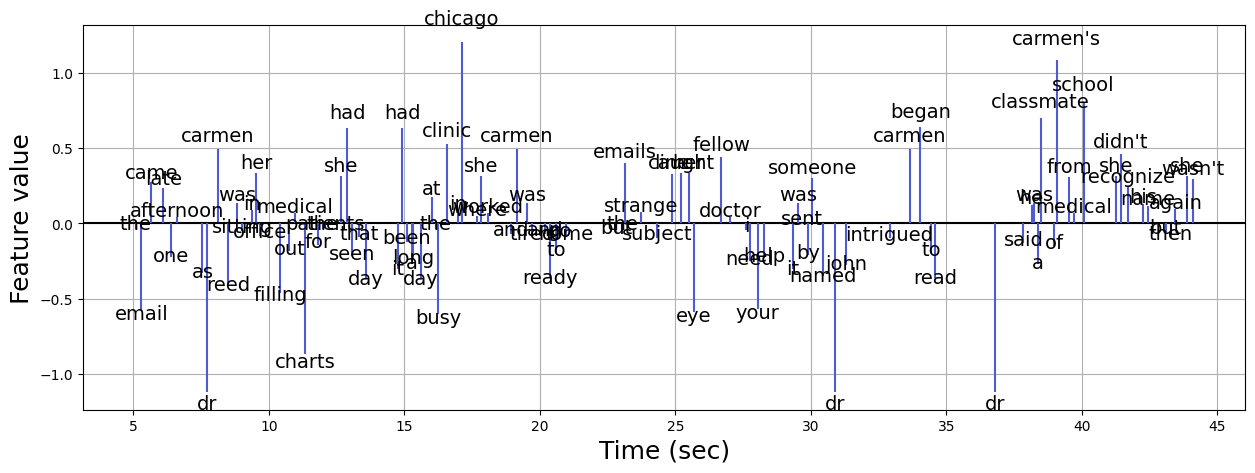

In [16]:
n_words = 100   # first 100 words
feature = 0     # first feature

plt.figure(figsize=(15,5))
plt.axhline(0, c='k')
plt.vlines(word_embedding['onset'][:n_words], [0], 
           word_embedding.iloc[:n_words, feature + 2], color='#4f5bd5', label='word vectors')
# The blue peak represents each word

for i in range(n_words):
    plt.text(word_embedding['onset'][i], 1.1*word_embedding.iloc[i, feature+2], 
             s=word_embedding['word'][i], ha='center', fontsize=14)

plt.xlabel('Time (sec)', fontsize=18)
plt.ylabel('Feature value', fontsize=18)
plt.grid()

Next, we need to downsample the word vector to the scale of the fMRI data. Here, we use a linear interpolation function. The red line represents the downsampled signal. 

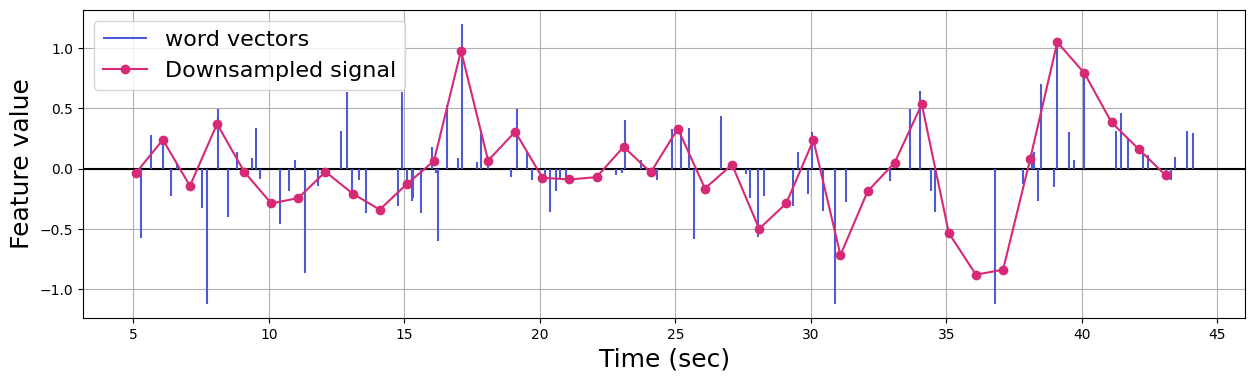

In [17]:
plt.figure(figsize=(15,4))
plt.axhline(0, c='k')
plt.vlines(word_embedding['onset'][:n_words], [0], 
           word_embedding.iloc[:n_words, feature+2], color='#4f5bd5', label='word vectors')

# Linear interpolation
linear_downsample = interp1d(word_embedding['onset'][:n_words], 
                             word_embedding.iloc[:n_words, feature+2], kind='linear')

TR_time = np.arange(np.min(word_embedding['onset'][:n_words]), np.max(word_embedding['onset'][:n_words])) # Specify the number of time points
downsampled_vector = linear_downsample(TR_time)

plt.plot(TR_time, downsampled_vector, 'o-',color='#d62976', label='Downsampled signal')

plt.legend(loc='upper left', fontsize=16)
plt.xlabel('Time (sec)', fontsize=18)
plt.ylabel('Feature value', fontsize=18)
plt.grid()

We convolve this downsampled signal with the hemodynamic response function (HRF) to obtain temporally lagged fMRI responses. We will be using the Glover double gamma HRF.

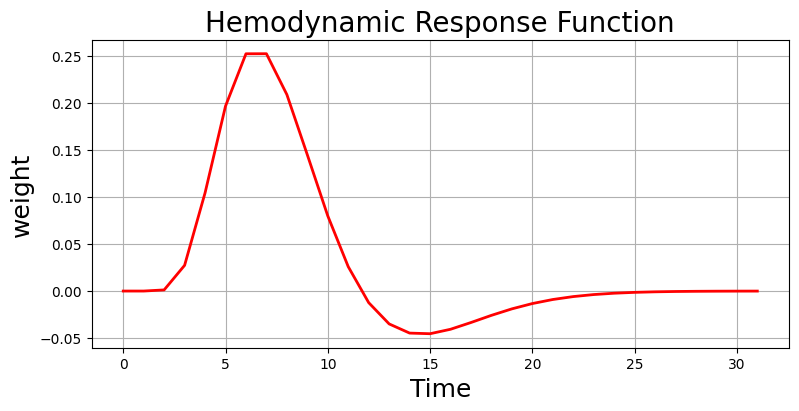

In [18]:
hrf_weight = glover_hrf(1, oversampling=1)

plt.figure(figsize=(9,4))
plt.plot(hrf_weight, 'r-', linewidth=2)
plt.ylabel('weight', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Hemodynamic Response Function', fontsize=20)
plt.grid()

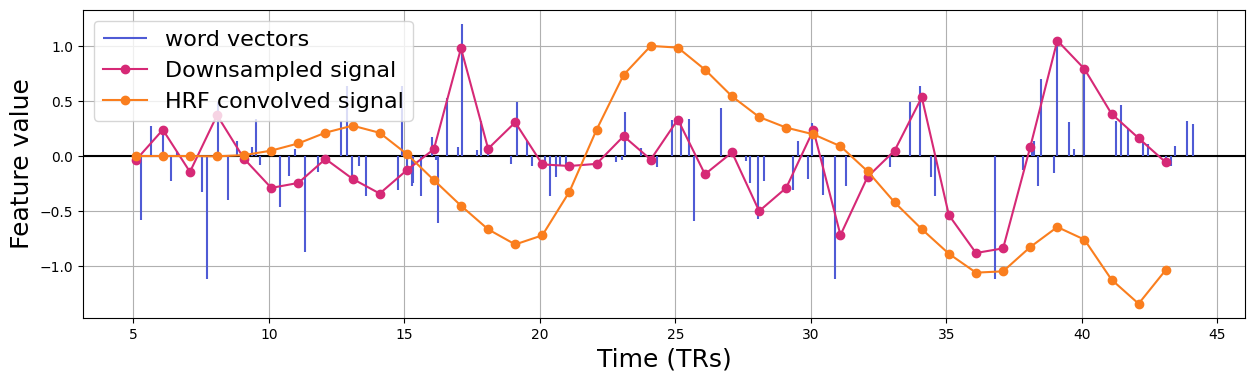

In [19]:
plt.figure(figsize=(15,4))
plt.axhline(0, c='k')
plt.vlines(word_embedding['onset'][:n_words], [0], 
           word_embedding.iloc[:n_words, feature+2], color='#4f5bd5', label='word vectors')

# Linear interpolation
linear_downsample = interp1d(word_embedding['onset'][:n_words], 
                             word_embedding.iloc[:n_words, feature+2], kind='linear')

TR_time = np.arange(np.min(word_embedding['onset'][:n_words]), np.max(word_embedding['onset'][:n_words])) # Specify the number of time points
downsampled_vector = linear_downsample(TR_time)

plt.plot(TR_time, downsampled_vector, 'o-',color='#d62976', label='Downsampled signal')

# Convolve HRF
convolved = np.convolve(downsampled_vector, hrf_weight, mode='full')[:len(downsampled_vector)]
plt.plot(TR_time, convolved/np.max(convolved), 'o-',color='#fa7e1e', label='HRF convolved signal')

plt.legend(loc='upper left', fontsize=16)
plt.xlabel('Time (TRs)', fontsize=18)
plt.ylabel('Feature value', fontsize=18)
plt.grid()


Apply the steps above to all features in the embedding space.

In [20]:
def downsample_embeddings(word_embeddings, kind='linear', convolve_hrf=True):
    '''Downsample word embeddings dataframe to TR and convolve with HRF'''
    
    word_time = word_embeddings['onset']
    embeddings = word_embeddings.iloc[:, 2:]
    linear_downsample = interp1d(word_time, embeddings, kind=kind, axis=0)
    TR_time = np.arange(np.min(word_time), np.max(word_time), 1) # Specify the number of time points
    downsampled_vector = linear_downsample(TR_time)
    downsampled_vector = np.nan_to_num(downsampled_vector, nan=0) # Replace NaNs with zeros for convolution
    downsampled_vector = np.concatenate([np.zeros((5, n_feature)), downsampled_vector, np.zeros((2, 100))], axis=0) # Pad beginning and end with zeros

    if convolve_hrf:
        return np.array([np.convolve(x, hrf_weight)[:len(x)] for x in downsampled_vector.T]).T
    else:
        return downsampled_vector
    
n_TR = 1310
n_feature = 100

paranoia_embedding = downsample_embeddings(word_embedding)

## Simple Neural decoding model
### Decoding natural language from the fMRI data (using cross-validation across subjects)
Finally, we have the fMRI data of (1310, 268), and the natural language data of (1310, 100). 

We use a simple neural model to learn the relationship between the fMRI responses and word embeddings computed from the Paranoia transcript.In other words, we train a neural model with all time points for all subjects and test the model on the held-out participants' fMRI time course. The fMRI responses (x) are different for the 22 participants, but the word embedding time course (y) is the same.  

We predict the word embedding vector of each time point and measure its similarity (i.e., cosine similarity) with the observed vector. The decoding is successful if the similarity between the predicted and corresponding observed word vectors is ranked within the top-N over the similarities between the predicted and observed word vectors at all other time steps. Here, we use top-10, meaning the decoding is successful if the similarity between the predicted and observed vectors is within a rank of 10 over 1310 other possible observed vectors. Thus, the chance level is 10 / 1310 * 100 = 0.763%.

In [21]:
import glob
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset

from sklearn.preprocessing import Normalizer, MinMaxScaler


class FmriDataset(Dataset):
    def __init__(self, data_root=".", start = 0, end = len(fmri_data[0])*len(fmri_data)):
        
        self.data_root = data_root

        Y = zscore(paranoia_embedding, axis=0)
        
        x_arr = []
        y_arr = []

        for i in range(0, len(fmri_data)):
          x_arr.extend(fmri_data[i])
          y_arr.extend(Y)

        self.data_fine = x_arr
        self.glove_fine = y_arr

        # print(self.data_fine)
        # print(self.class_fine)
    
    def __len__(self):
        return len(self.data_fine)

    def __getitem__(self, idx):
        fmri_scan = self.data_fine[idx]
        glove_emb = self.glove_fine[idx]
        
        return torch.tensor(fmri_scan).float(), torch.tensor(glove_emb).float()

In [22]:
import os
import random
import numpy as np
from pandas import concat

import torch
import torch.nn as nn
import torch.nn.functional as F

In [23]:
train_dataset = FmriDataset(start = 0, end = int(3 * len(fmri_data[0])*len(fmri_data) / 4)) # Brain2word Dataset
val_dataset = FmriDataset(start = int(3 * len(fmri_data[0])*len(fmri_data) / 4) + 1) # Brain2word Dataset


In [24]:
from torch.utils.data import DataLoader, RandomSampler
train_sampler = RandomSampler(train_dataset)

train_loader = DataLoader(
        train_dataset,
        sampler=train_sampler,
        batch_size=16,
        num_workers=4,
        pin_memory=True,
        drop_last=True,
    )

In [25]:
val_loader = DataLoader(
        val_dataset,
        shuffle=True,
        batch_size=16,
        num_workers=4,
        pin_memory=True,
    )

In [26]:
num_iter = len(train_loader)
print(f"training iterations {num_iter}")

training iterations 1801


In [27]:
class ROIBaseline(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
                    nn.Linear(268, 200),
                    nn.BatchNorm1d(200),
                    nn.LeakyReLU(0.3),
                )

        self.regressor = nn.Sequential(
            nn.Linear(200, 150), nn.BatchNorm1d(150), nn.LeakyReLU(0.3),
            nn.Linear(150, 100), 
        )

        self.dropout = nn.Dropout(0.4)


    def forward(self, x):

        output = self.encoder(x)

        reg_out = self.regressor(self.dropout(output))

        return reg_out


In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
print(f"{device} being used with {n_gpu} GPUs!!")

cuda being used with 1 GPUs!!


In [46]:
brain_model = ROIBaseline()

In [47]:
total_parameters = 0
for name, child in brain_model.named_children():
    num_params = sum([p.numel() for p in child.parameters() if p.requires_grad])
    if num_params > 0:
        print(f"No. of params in {name}: {num_params}")
        total_parameters += num_params

print(f"Total number of params: {total_parameters}")


No. of params in encoder: 54200
No. of params in regressor: 45550
Total number of params: 99750


In [48]:
if n_gpu > 1:
  brain_model = nn.DataParallel(brain_model)

In [49]:
brain_model.to(device)

params = list([p for p in brain_model.parameters()])

In [50]:
from torch.optim import *
optimizer = RMSprop(params, lr=1e-3)

In [51]:
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        factor=0.7,
        patience=4,
        threshold=1e-3,
        min_lr=1e-6,
        verbose=True,
    )

In [52]:
num_iter = len(train_loader)
print(f"training iterations {num_iter}")

training iterations 1801


In [53]:
from torch.nn.modules.loss import L1Loss
from time import time

mse_loss = nn.MSELoss()

train_losses = []
val_losses = []

hit_arr = []

n_top = 10

for epochId in range(25):
  brain_model.train()

  optimizer.zero_grad()

  total_loss = 0

  data_len = len(train_loader)

  epoch_start = time()

  num_examples = 0
  for step, batch in enumerate(train_loader):
      iterId = step + (epochId * data_len) - 1
      with torch.no_grad():
          batch = (x.cuda(non_blocking=True) for x in batch)
          fmri_scan, glove_emb = batch

          batch_size = fmri_scan.shape[0]

      start_time = time()
      y_pred = brain_model(fmri_scan)

      loss = mse_loss(y_pred, glove_emb)


      # loss = torch.tensor(1/loss, requires_grad=True)

      loss.backward()
      

      optimizer.step()
      brain_model.zero_grad()
      end_time = time()
      elapsed_time = end_time - start_time

      total_loss += float(loss.item())
        
      num_examples += batch_size

  val_loss = 0.0
  brain_model.eval()     # Optional when not using Model Specific layer
  hits = []
  for step, batch in enumerate(val_loader):
      with torch.no_grad():
          batch = (x.cuda(non_blocking=True) for x in batch)
          fmri_scan, glove_emb = batch

          batch_size = fmri_scan.shape[0]
      
      target = brain_model(fmri_scan)
      similarity = cosine_similarity(target.cpu().detach().numpy(),glove_emb.cpu().detach().numpy())

      hit = 0
      for j in range(similarity.shape[0]):        
          if j in similarity[j,:].argsort()[-n_top:][::-1]:
              hit += 1
      hits.append(100*hit/similarity.shape[0])

      loss = mse_loss(target, glove_emb)
      val_loss += float(loss.item())

  epoch_end = time()
  epoch_time = epoch_end - epoch_start

  train_loss = total_loss / data_len
  train_losses.append(train_loss)
  val_loss = val_loss / len(val_loader)
  val_losses.append(val_loss)

  hit_mean = np.array(hits).mean()
  hit_arr.append(hit_mean)

  print(
        f"FINISHED Epoch:{epochId:2d} t_loss {train_loss} v_loss {val_loss} val_acc {hit_mean} elapsed {epoch_time:.2f}"
    )

FINISHED Epoch: 0 t_loss 1.0007449393468324 v_loss 0.9809838084547422 val_acc 80.23376803551609 elapsed 10.62
FINISHED Epoch: 1 t_loss 0.9841124151959014 v_loss 0.9702049919489882 val_acc 82.74139844617092 elapsed 10.34
FINISHED Epoch: 2 t_loss 0.9768730549597859 v_loss 0.9631131904305152 val_acc 83.41426193118757 elapsed 10.61
FINISHED Epoch: 3 t_loss 0.9730371200396312 v_loss 0.9592717187716879 val_acc 83.69519977802442 elapsed 10.59
FINISHED Epoch: 4 t_loss 0.9701877551764531 v_loss 0.9559172908222503 val_acc 84.64553274139844 elapsed 10.69
FINISHED Epoch: 5 t_loss 0.9673014161058561 v_loss 0.9519005187939062 val_acc 85.84211986681466 elapsed 10.43
FINISHED Epoch: 6 t_loss 0.9649523063741214 v_loss 0.950123380642223 val_acc 86.35197003329634 elapsed 10.71
FINISHED Epoch: 7 t_loss 0.9637891550583021 v_loss 0.9476316554035649 val_acc 86.7473640399556 elapsed 11.43
FINISHED Epoch: 8 t_loss 0.9614454806678365 v_loss 0.9448937542165953 val_acc 86.84100998890122 elapsed 10.63
FINISHED Epo

Text(0, 0.5, 'MSE Loss')

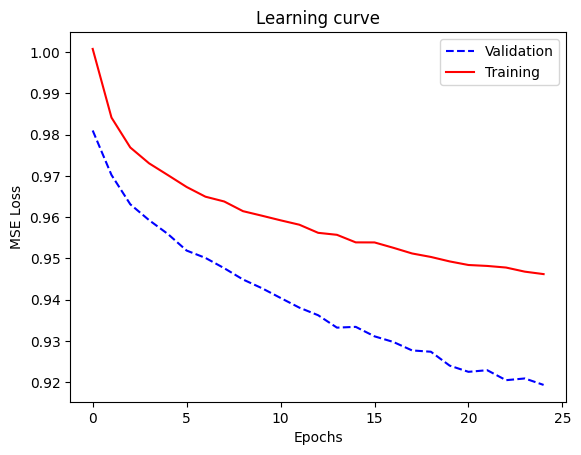

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(len(val_losses)), val_losses, '--b', label='Validation')
ax.plot(range(len(train_losses)), train_losses, '-r', label='Training')
leg = ax.legend()
plt.title("Learning curve")
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')

Text(0, 0.5, 'Decoding Acc')

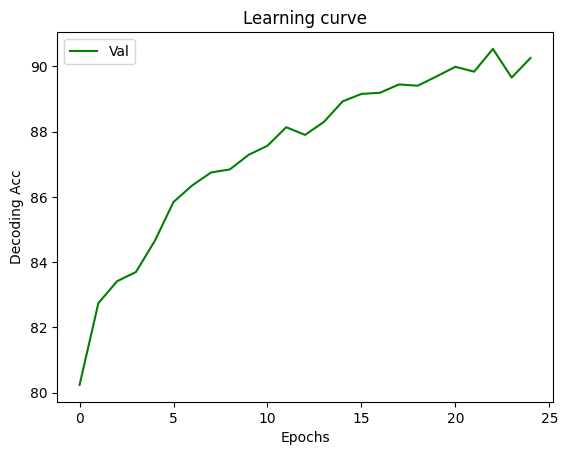

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(len(hit_arr)), hit_arr, '-g', label='Val')
leg = ax.legend()
plt.title("Learning curve")
plt.xlabel('Epochs')
plt.ylabel('Decoding Acc')


#### Decoding the representation of words in context
To improve your decoding model, you can modify the current embedding method. For example, you might think that the interpretation of the word's meaning at the current time step is affected by the words that appear at the preceding time steps. We can examine whether the decoding accuracy can be improved by considering contextual information of a word. 

In this simple example, let us consider the representation of the word at the current time as the weighted sum of the 5 consecutive previous words.

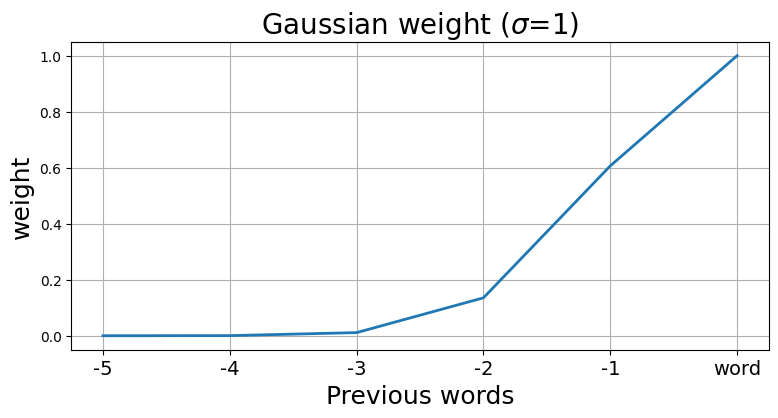

In [58]:
# We apply a Gaussian window to compute the weighted sum of the previous words
n_previous_words = 6 # including the word itself 

window = signal.gaussian(n_previous_words*2+1, std=1)[1:n_previous_words + 1]
plt.figure(figsize=(9, 4))
plt.plot(window, lw=2)
plt.title("Gaussian weight ($\sigma$=1)", fontsize=20)
plt.ylabel("weight", fontsize=18)
plt.xticks(np.arange(n_previous_words), ['{}'.format(-n_previous_words+i) 
                                         for i in range(1, n_previous_words)]+['word'], fontsize=14)
plt.xlabel("Previous words", fontsize=18)
plt.grid()

First, apply Gaussian weights to all time steps.

In [59]:
n_words = word_embedding.shape[0]

word_embedding_context = []
for i in range(n_words):
    if i < n_previous_words:
        weight = window[-(i+1):]
        word_embedding_context.append(np.sum([weight[w]*word_embedding.iloc[w, 2:] for w in range(i+1)], axis=0)/(i + 1))
    else:
        weight = window
        word_embedding_context.append(np.sum([weight[w]*word_embedding.iloc[i-n_previous_words + w + 1, 2:] 
                                              for w in range(n_previous_words)], axis=0)/(n_previous_words))

word_embedding_context = pd.concat([word_embedding.loc[:, ['onset', 'word']], 
                                    pd.DataFrame(word_embedding_context)], axis=1)

paranoia_embedding_context = downsample_embeddings(word_embedding_context)


Next, compare the weighted word vectors with the original word vectors over time.

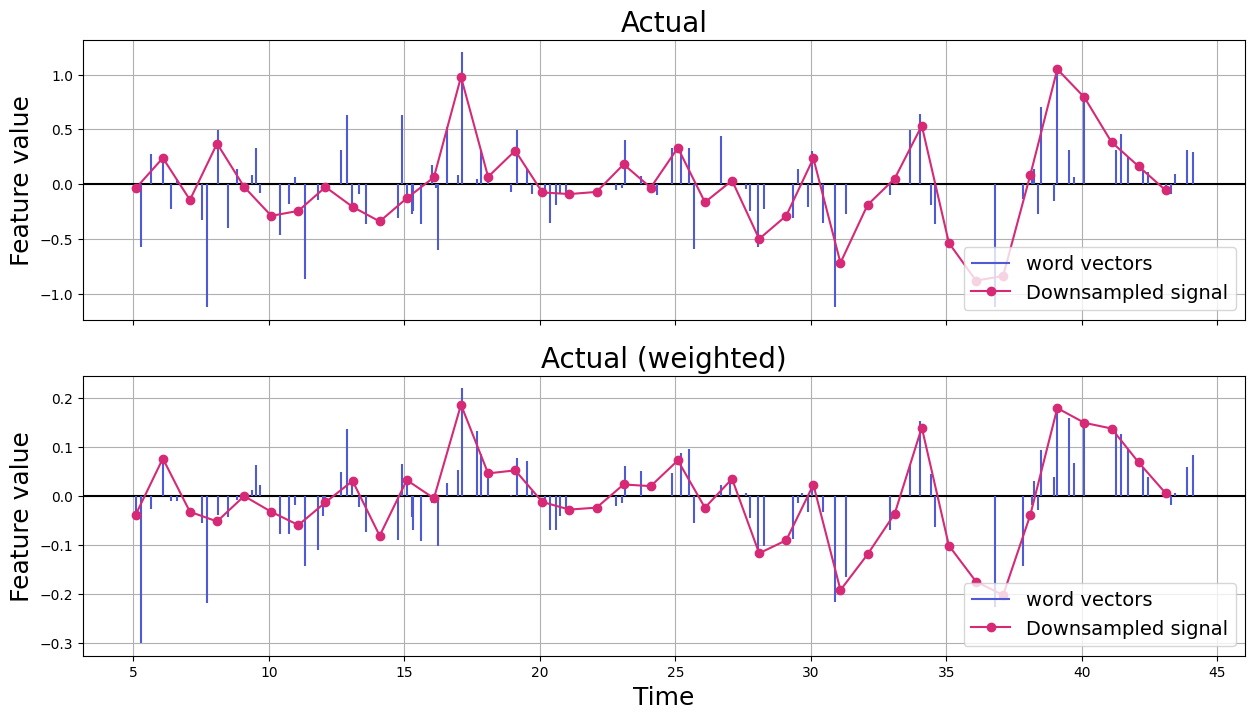

In [60]:
n_words = 100
feature = 0

f,a = plt.subplots(nrows=2, figsize=(15,8), sharex=True)
a[0].axhline(0, c='k')
a[0].vlines(word_embedding['onset'][:n_words], [0], 
            word_embedding.iloc[:n_words, feature + 2], 
            color='#4f5bd5', label='word vectors')

# Linear interpolation
linear_downsample = interp1d(word_embedding['onset'][:n_words], 
                             word_embedding.iloc[:n_words, feature+2], kind='linear')

TR_time = np.arange(np.min(word_embedding['onset'][:n_words]), np.max(word_embedding['onset'][:n_words])) # Specify the number of time points
downsampled_vector = linear_downsample(TR_time)

a[0].plot(TR_time, downsampled_vector, 'o-',color='#d62976', label='Downsampled signal')
a[0].legend(loc='lower right', fontsize=14)
a[0].set_ylabel('Feature value', fontsize=18)
a[0].set_title('Actual', fontsize=20)
a[0].grid()

a[1].axhline(0, c='k')
a[1].vlines(word_embedding['onset'][:n_words], [0], 
            word_embedding_context.iloc[:n_words, feature + 2], 
            color='#4f5bd5', label='word vectors')

# Linear interpolation
linear_downsample = interp1d(word_embedding_context['onset'][:n_words], 
                             word_embedding_context.iloc[:n_words, feature+2], kind='linear')

TR_time = np.arange(np.min(word_embedding_context['onset'][:n_words]), np.max(word_embedding_context['onset'][:n_words])) # Specify the number of time points
downsampled_vector = linear_downsample(TR_time)

a[1].plot(TR_time, downsampled_vector, 'o-',color='#d62976', label='Downsampled signal')
a[1].legend(loc='lower right', fontsize=14)
a[1].set_xlabel('Time', fontsize=18)
a[1].set_ylabel('Feature value', fontsize=18)
a[1].set_title('Actual (weighted)', fontsize=20)
plt.grid()

In [61]:
class FmriDataset(Dataset):
    def __init__(self, data_root=".", start = 0, end = len(fmri_data[0])*len(fmri_data)):
        
        self.data_root = data_root

        Y = zscore(paranoia_embedding_context, axis=0) # Normalize each feature dimension
        
        x_arr = []
        y_arr = []

        for i in range(0, len(fmri_data)):
          x_arr.extend(fmri_data[i])
          y_arr.extend(Y)

        self.data_fine = x_arr
        self.glove_fine = y_arr

        # print(self.data_fine)
        # print(self.class_fine)
    
    def __len__(self):
        return len(self.data_fine)

    def __getitem__(self, idx):
        fmri_scan = self.data_fine[idx]
        glove_emb = self.glove_fine[idx]
        
        return torch.tensor(fmri_scan).float(), torch.tensor(glove_emb).float()

In [62]:
train_dataset = FmriDataset(start = 0, end = int(3 * len(fmri_data[0])*len(fmri_data) / 4)) # Brain2word Dataset
val_dataset = FmriDataset(start = int(3 * len(fmri_data[0])*len(fmri_data) / 4) + 1) # Brain2word Dataset


In [63]:
from torch.utils.data import DataLoader, RandomSampler
train_sampler = RandomSampler(train_dataset)

train_loader = DataLoader(
        train_dataset,
        sampler=train_sampler,
        batch_size=16,
        num_workers=4,
        pin_memory=True,
        drop_last=True,
    )

In [64]:
val_loader = DataLoader(
        val_dataset,
        shuffle=True,
        batch_size=16,
        num_workers=4,
        pin_memory=True,
    )

In [65]:
num_iter = len(train_loader)
print(f"training iterations {num_iter}")

training iterations 1801


In [66]:
brain_model = ROIBaseline()

In [67]:
total_parameters = 0
for name, child in brain_model.named_children():
    num_params = sum([p.numel() for p in child.parameters() if p.requires_grad])
    if num_params > 0:
        print(f"No. of params in {name}: {num_params}")
        total_parameters += num_params

print(f"Total number of params: {total_parameters}")


No. of params in encoder: 54200
No. of params in regressor: 45550
Total number of params: 99750


In [68]:
if n_gpu > 1:
  brain_model = nn.DataParallel(brain_model)

In [69]:
brain_model.to(device)

params = list([p for p in brain_model.parameters()])

In [70]:
from torch.optim import *
optimizer = RMSprop(params, lr=1e-3)

In [71]:
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        factor=0.7,
        patience=4,
        threshold=1e-3,
        min_lr=1e-6,
        verbose=True,
    )

In [72]:
num_iter = len(train_loader)
print(f"training iterations {num_iter}")

training iterations 1801


In [73]:
from torch.nn.modules.loss import L1Loss
from time import time

mse_loss = nn.MSELoss()

train_losses = []
val_losses = []

hit_arr = []

n_top = 10

for epochId in range(25):
  brain_model.train()

  optimizer.zero_grad()

  total_loss = 0

  data_len = len(train_loader)

  epoch_start = time()

  num_examples = 0
  for step, batch in enumerate(train_loader):
      iterId = step + (epochId * data_len) - 1
      with torch.no_grad():
          batch = (x.cuda(non_blocking=True) for x in batch)
          fmri_scan, glove_emb = batch

          batch_size = fmri_scan.shape[0]

      start_time = time()
      y_pred = brain_model(fmri_scan)

      loss = mse_loss(y_pred, glove_emb)


      # loss = torch.tensor(1/loss, requires_grad=True)

      loss.backward()
      

      optimizer.step()
      brain_model.zero_grad()
      end_time = time()
      elapsed_time = end_time - start_time

      total_loss += float(loss.item())
        
      num_examples += batch_size

  val_loss = 0.0
  brain_model.eval()     # Optional when not using Model Specific layer
  hits = []
  for step, batch in enumerate(val_loader):
      with torch.no_grad():
          batch = (x.cuda(non_blocking=True) for x in batch)
          fmri_scan, glove_emb = batch

          batch_size = fmri_scan.shape[0]
      
      target = brain_model(fmri_scan)
      similarity = cosine_similarity(target.cpu().detach().numpy(),glove_emb.cpu().detach().numpy())

      hit = 0
      for j in range(similarity.shape[0]):        
          if j in similarity[j,:].argsort()[-n_top:][::-1]:
              hit += 1
      hits.append(100*hit/similarity.shape[0])

      loss = mse_loss(target, glove_emb)
      val_loss += float(loss.item())

  epoch_end = time()
  epoch_time = epoch_end - epoch_start

  train_loss = total_loss / data_len
  train_losses.append(train_loss)
  val_loss = val_loss / len(val_loader)
  val_losses.append(val_loss)

  hit_mean = np.array(hits).mean()
  hit_arr.append(hit_mean)

  print(
        f"FINISHED Epoch:{epochId:2d} t_loss {train_loss} v_loss {val_loss} val_acc {hit_mean} elapsed {epoch_time:.2f}"
    )

FINISHED Epoch: 0 t_loss 0.9984103839043973 v_loss 0.9779441418182043 val_acc 80.27885682574917 elapsed 10.84
FINISHED Epoch: 1 t_loss 0.9808487401016549 v_loss 0.9651660734620131 val_acc 82.26623196448391 elapsed 10.79
FINISHED Epoch: 2 t_loss 0.9739609091961007 v_loss 0.9590144882786948 val_acc 83.34142619311876 elapsed 10.62
FINISHED Epoch: 3 t_loss 0.9693132003832367 v_loss 0.9551327045299899 val_acc 84.02122641509433 elapsed 10.74
FINISHED Epoch: 4 t_loss 0.9666224376219369 v_loss 0.952665460592634 val_acc 85.38776359600443 elapsed 10.95
FINISHED Epoch: 5 t_loss 0.9640007470793885 v_loss 0.9491569283402853 val_acc 84.93340732519422 elapsed 11.09
FINISHED Epoch: 6 t_loss 0.961771157600693 v_loss 0.9443117862403988 val_acc 86.34156492785793 elapsed 10.95
FINISHED Epoch: 7 t_loss 0.9601807080660179 v_loss 0.9441710797517864 val_acc 86.25138734739178 elapsed 11.01
FINISHED Epoch: 8 t_loss 0.9583760903385995 v_loss 0.9409769994106462 val_acc 86.75430077691453 elapsed 10.58
FINISHED Epo

Text(0, 0.5, 'MSE Loss')

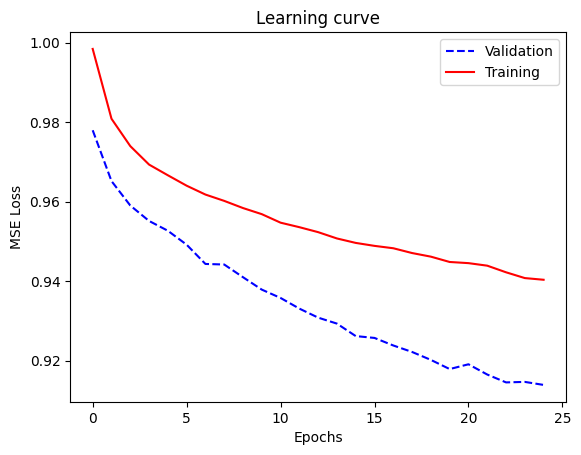

In [74]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(len(val_losses)), val_losses, '--b', label='Validation')
ax.plot(range(len(train_losses)), train_losses, '-r', label='Training')
leg = ax.legend()
plt.title("Learning curve")
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')

Text(0, 0.5, 'Decoding Acc')

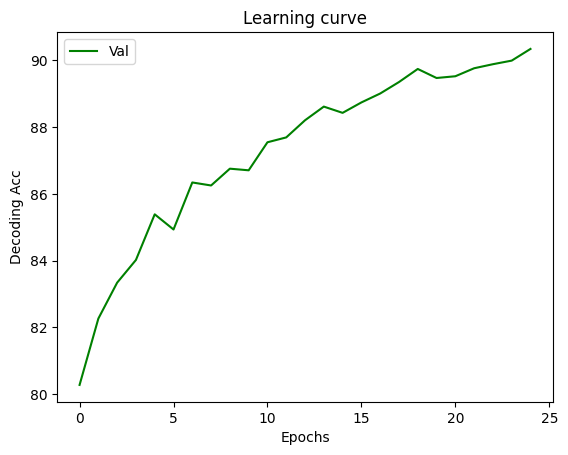

In [75]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(len(hit_arr)), hit_arr, '-g', label='Val')
leg = ax.legend()
plt.title("Learning curve")
plt.xlabel('Epochs')
plt.ylabel('Decoding Acc')
